<a href="https://colab.research.google.com/github/juanxds/juanxds/blob/main/laptop_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Purpose:**
##    This code use advanced regression to predict laptop prices

**Author: Juan Luis Herrera**

# Import required libraries

In [3]:
# Importing libraries
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Define required functions

In [4]:
def get_int(str):
  """"Remove characters from a string and return integers"""
  return int(re.sub('\D','', str))

In [5]:
def get_char(str):
  """"Remove characters from a string and return just the characters"""
  return re.sub('[0-9,.]','', str)

In [28]:
def get_float(str):
  """"Remove characters from a string and return float numbers"""
  return round(float(re.sub('[A-z,a-z]','', str)),2)

In [29]:
str ='5.6GB'
get_float(str)

5.6

In [7]:
def get_unique_values(dataframe):
  """Get the unique values of each column of dataframe"""
  """The function returns a dictionary with the unique values of each column"""
  
  df_values = {}
  vars = list(dataframe.columns)

  for var in vars:
    values = list(dataframe[var].unique())
    df_values[var] = sorted(values)
  
  return df_values

In [8]:
def get_n_unique(dataframe):
  """Get how many unique values are in a column of a dataframe """
  """The function returns a dictionary with the number of unique values"""
  """in each column"""

  df_unique_values = {}
  vars = list(dataframe.columns)

  for var in vars:
    df_unique_values[var] = df[var].nunique()
  
  return df_unique_values

In [54]:
def get_box_plot(data, x, y, orient, title):
  """The function produce a boxplot between a categorical variable"""
  """a continuous variable"""
  """Parameters:"""
  """Data = Dataset to be visualized"""
  """x = categorical variable"""
  """y = continuos variable"""
  """orient = Orientation can be 'h' for horizontal and 'v' for vertical"""
  """title = The title of the boxplot"""

  sns.set()
  sns.set_style('whitegrid')
  sns.axes_style('whitegrid')

  if orient == 'v':
    boxplot = sns.boxplot(x = x,
                          y = y,
                          orient = 'v',
                          data = data)
  elif orient == 'h':
    box_plot = sns.boxplot(x = y,
                           y = x,
                           orient = 'h',
                           data = data)
  else :
     boxplot = sns.boxplot(x = x,
                          y = y,
                          orient = 'v',
                          data = data)
  
  plt.title(title)
  plt.tight_layout()
  plt.show()


# Import raw data

In [9]:
# Import data set
# CSV file
# Assign the filename: file
file = '/content/drive/MyDrive/datasets/laptop_price/laptop_price.csv' # write path and file name

# Read the file into a DataFrame: df
df = pd.read_csv(file, encoding='latin-1')


In [10]:
# View DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [11]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


# Cleaning and preparing data

In [12]:
# Get independent variables
ind_var = list(df.columns[1:-1])
print(ind_var)
type(ind_var)

['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


list

In [14]:
# Get independent variables
dep_var = df.columns[-1]
print(dep_var)
type(dep_var)

Price_euros


str

In [15]:
# Get the unique values of independent variables
df_values = get_unique_values(df[ind_var])

for key in df_values.keys():
  print(f"{key} : {df_values[key]}")

Company : ['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi']
Product : ['110-15ACL (A6-7310/4GB/500GB/W10)', '14-am079na (N3710/8GB/2TB/W10)', '15-AC110nv (i7-6500U/6GB/1TB/Radeon', '15-AY023na (N3710/8GB/2TB/W10)', '15-BA015wm (E2-7110/4GB/500GB/W10)', '15-BS026nv (i5-7200U/8GB/256GB/Radeon', '15-BS028nv (i3-6006U/4GB/1TB/Radeon', '15-BS078nr (i7-7500U/8GB/1TB/W10)', '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', '15-BS103nv (i5-8250U/6GB/256GB/Radeon', '15-BW004nv (A9-9420/4GB/256GB/Radeon', '15-BW037na (A9-9420/4GB/1TB/Radeon', '15-BW091ND (A9-9420/6GB/1TB', '15-BW094nd (A6-9220/8GB/128GB/W10)', '15-ay047nv (i3-6006U/6GB/1TB/Radeon', '15-ba043na (A12-9700P/8GB/2TB/W10)', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)', '15-bs005nv (i3-6006U/4GB/1TB', '15-bs011nv (i7-7500U/4GB/500GB/Radeon', '15-bs012nv (i7-7500U/8GB/1TB/Radeon', '15-bs015dx (i5-7200U/8GB/1TB/W10)', '15

In [16]:
# Quantify unique value in each independent variable
df_unique_values = get_n_unique(df[ind_var])

for key in df_unique_values.keys():
  print(f"{key} : {df_unique_values[key]}")

Company : 19
Product : 618
TypeName : 6
Inches : 18
ScreenResolution : 40
Cpu : 118
Ram : 9
Memory : 39
Gpu : 110
OpSys : 9
Weight : 179


In [17]:
df['Ram_num'] = df['Ram'].apply(get_int)
print(df['Ram_num'].unique())

[ 8 16  4  2 12  6 32 24 64]


In [18]:
df['Ram_measure'] = df['Ram'].apply(get_char)
print(df['Ram_measure'].unique())

['GB']


In [19]:
df['Memory_num'] = df['Memory'].apply(get_int)
print(df['Memory_num'].unique())

[   128    256    512    500      1     32   1281 256256     64   2561
   2562      2     10   5121 256500   1282 512512     16 512256   5122
    641    180     11    240      8    508  51210  25610]


In [20]:
df['Memory_measure'] = df['Memory'].apply(get_char)
print(df['Memory_measure'].unique())

['GB SSD' 'GB Flash Storage' 'GB HDD' 'TB HDD' 'GB SSD +  TB HDD'
 'GB SSD +  GB SSD' 'TB Hybrid' 'TB SSD' 'GB SSD +  GB HDD'
 'GB Flash Storage +  TB HDD' 'TB HDD +  TB HDD' 'TB SSD +  TB HDD'
 'GB Hybrid' 'GB SSD +  TB Hybrid']


In [30]:
df['Weight_num'] = df['Weight'].apply(get_float)
print(df['Weight_num'].unique())

[1.37 1.34 1.86 1.83 2.1  2.04 1.3  1.6  2.2  0.92 1.22 0.98 2.5  1.62
 1.91 2.3  1.35 1.88 1.89 1.65 2.71 1.2  1.44 2.8  2.   2.65 2.77 3.2
 0.69 1.49 2.4  2.13 2.43 1.7  1.4  1.8  1.9  3.   1.25 2.7  2.02 1.63
 1.96 1.21 2.45 1.5  2.62 1.38 1.58 1.85 1.23 1.26 2.16 2.36 2.05 1.32
 1.75 0.97 2.9  2.56 1.48 1.74 1.1  1.56 2.03 1.05 4.4  1.29 1.95 2.06
 1.12 1.42 3.49 3.35 2.23 4.42 2.69 2.37 4.7  3.6  2.08 4.3  1.68 1.41
 4.14 2.18 2.24 2.67 2.14 1.36 2.25 2.15 2.19 2.54 3.42 1.28 2.33 1.45
 2.79 1.84 2.6  2.26 3.25 1.59 1.13 1.78 1.15 1.27 1.43 2.31 1.16 1.64
 2.17 1.47 3.78 1.79 0.91 1.99 4.33 1.93 1.87 2.63 3.4  3.14 1.94 1.24
 4.6  4.5  2.73 1.39 2.29 2.59 2.94 1.14 3.8  3.31 1.09 3.21 1.19 1.98
 1.17 4.36 1.71 2.32 4.2  1.55 0.81 1.18 2.72 1.31 3.74 1.76 1.54 2.83
 2.07 2.38 3.58 1.08 2.75 2.99 1.11 2.09 4.   0.99 3.52 2.21 3.3  2.34]


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Ram_num           1303 non-null   int64  
 14  Ram_measure       1303 non-null   object 
 15  Memory_num        1303 non-null   int64  
 16  Memory_measure    1303 non-null   object 


# Data Exploration

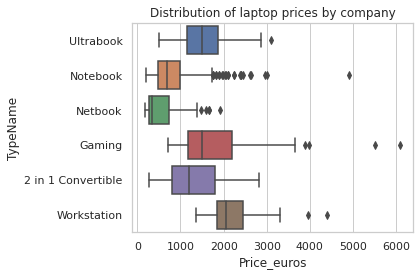

In [52]:
get_box_plot(data = df,
             x = 'TypeName',
             y = 'Price_euros',
             orient = 'h', title = 'Distribution of laptop prices by company')

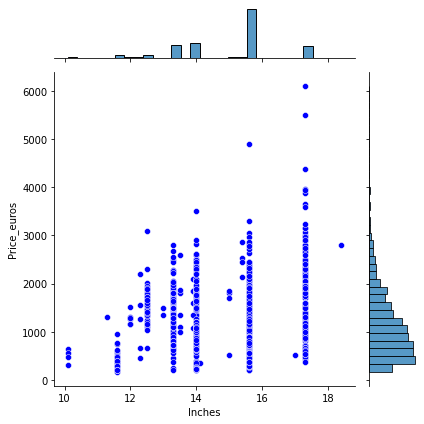

In [32]:
# Joint Plot 1
joint_plot = sns.jointplot(x = 'Inches',
                     y = 'Price_euros',
                     #kind = 'reg',
                     joint_kws={'color':'blue'},
                     data = df)


plt.tight_layout()
plt.show()

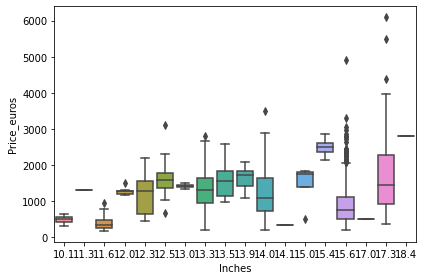

In [31]:
# Boxplot 
box_plot = sns.boxplot(x = 'Inches',
                       y = 'Price_euros',
                       data = df)
plt.tight_layout()
plt.show()

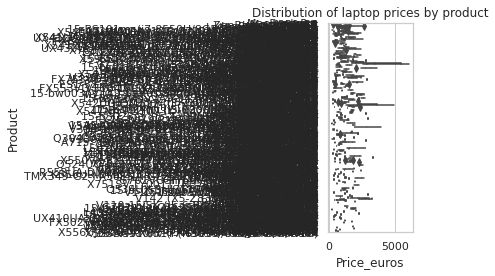

In [51]:
get_box_plot(data = df,
             x = 'Product',
             y = 'Price_euros',
             orient = 'h', title = 'Distribution of laptop prices by product' )

In [ ]:
# Joint Plot 2
joint_plot2 = sns.jointplot(x = 'median_income',
                     y = 'median_house_value',
                     kind = 'reg',
                     joint_kws={'color':'blue'},
                     data = df,
                     x_estimator = pd.np.median,
                     x_bins = 8)


plt.tight_layout()
plt.show()

In [ ]:
# Regression Plot 1
reg_plot = sns.regplot(x = 'Inches',
                     y = 'Price_euros',
                     data = df)


plt.tight_layout()
plt.show()


In [ ]:
# Regression Plot 2
reg_plot2 = sns.regplot(x = 'median_income',
                     y = 'median_house_value',
                     data = df,
                     x_estimator = pd.np.median,
                     x_bins = 8)


plt.tight_layout()
plt.show()

In [ ]:
# Residual Plot 1
resid_plot = sns.residplot(x = 'median_income',
                         y = 'median_house_value',
                         data = df,
                         lowess = True,
                         color = 'r',
                         line_kws = {'color':'black'})


plt.tight_layout()
plt.show()

In [ ]:
# Univariate OLS Regression
# OLS linear regression can be run using 'smf.ols'

model = 'median_house_value ~ median_income'

lm_model = smf.ols(formula = model,
                         data = df)

results = lm_model.fit()

print(results.summary())

# Accessing the results directory
dir(results)


In [ ]:
# Residuals
residuals = results.resid

print(residuals)

In [ ]:
# Fitted values
predicted_prices = results.fittedvalues

print(predicted_prices)


In [ ]:
# Advanced Regression Techniques - Regression Outliers

In [ ]:
# Bonferroni outlier test
test = results.outlier_test()

print('Bad data points (bonf(p) < 0.05):')
print(test[test.iloc[:, 2] < 0.05])